In [33]:
library(tidyverse)
library(stringr)
library(imager)
library(abind)
library(grid)
library(rtweet)
library(png)

In [3]:
drawImageWithText <- function(img, text, thresh, color = FALSE,
                              fontSize = 10, fileName = "myfile.png",
                              resize = TRUE, saveToDisk = FALSE) {
  
  if (color) {
    if (spectrum(img) == 1) {
      warning("Image is in grayscale mode, setting color to FALSE.")
      color = FALSE
    }
  }
  
  text <- paste(text, collapse = " ")
  text <- str_replace_all(text, "\n+", " ")
  text <- str_replace_all(text, " +", " ")
  
  text <- str_split(text, "")[[1]]
  
  if (resize) img <- resize(img, 700, 500)
  
  imgMat <- img %>%  as.array() %>% adrop(3) %>% aperm(c(2, 1, 3))
  
  imgGSMat <- img %>% grayscale %>% as.matrix %>% t()
  
  fatChars <- c(LETTERS[-which(LETTERS == "I")], "m", "w", "@")
  skinnyChars <- c("l", "I", "i", "t", "'", "f")
  
  if (saveToDisk) png(fileName, width(img), height(img))
  
  grid.newpage()
  
  counter <- 0
  
  for (i in seq(1, nrow(imgGSMat) - fontSize, fontSize + 1)) {
    for (j in seq(1, ncol(imgGSMat) - fontSize, fontSize)) {
      if (imgGSMat[i, j] < thresh) {
        counter <- ifelse(counter < length(text), counter + 1, 1)
        beforeLastChar <- ifelse(counter > 2, lastChar, " ")
        lastChar <- ifelse(counter > 1, char, " ")
        char <- text[counter]
        grid.text(char,
                  x = 0.01 + j/ncol(imgGSMat) +
                    0.004 * (lastChar %in% fatChars) -
                    0.003 * (lastChar %in% skinnyChars) +
                    0.003 * (beforeLastChar %in% fatChars) -
                    0.002 * (beforeLastChar %in% skinnyChars),
                  y = 1 - i / nrow(imgGSMat) - 0.01,
                  gp = gpar(fontsize = fontSize, col = ifelse(!color, 
                                                        "black",
                                                        rgb(imgMat[i, j, 1],
                                                            imgMat[i, j, 2],
                                                            imgMat[i, j, 3]))),
                  just = "left")
      }
    }
  }
  
  if (saveToDisk) suppressMessages(dev.off())
}

In [5]:
drawImageWithTextFromTwitter <- function(username, thresh, ...) {
  text <- get_timeline(username, n = 200) %>%
    select(text) %>%
    unlist() %>%
    discard(str_detect(., "^RT")) %>%
    str_replace(., "(http|https)[^([:blank:]|\"|<|&|#\n\r)]+", "") %>%
    str_extract_all(., "[a-zA-Z0-9[:punct:]]+") %>%
    unlist %>%
    paste(., collapse = " ")
  
  img <- load.image(lookup_users(username)$profile_image_url)
  
  drawImageWithText(img, text, thresh, ...)
}

trying URL 'http://pbs.twimg.com/profile_images/575425326638964738/UJ0GKa9P_normal.jpeg'
Content type 'unknown' length 1579 bytes
downloaded 1579 bytes



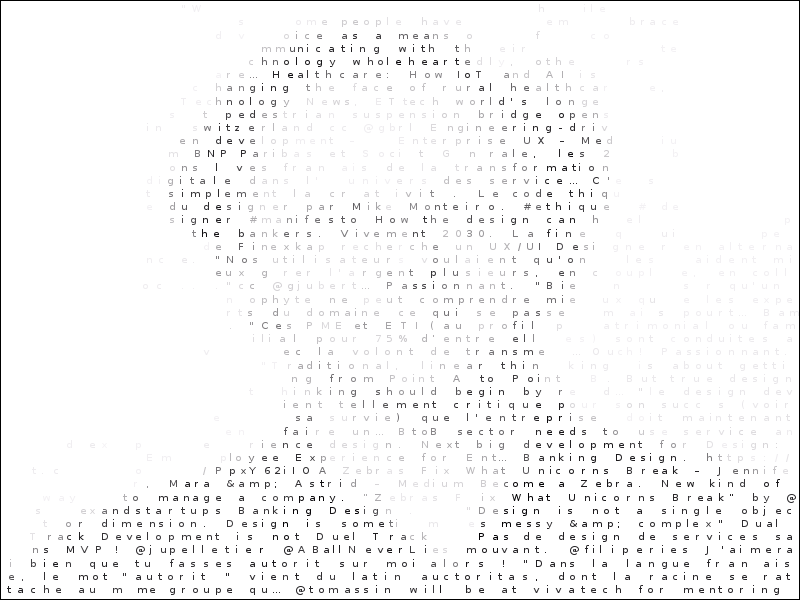

In [63]:
drawImageWithTextFromTwitter("tomassin", 0.95, color = TRUE, fontSize = 10, saveToDisk = FALSE)

 NULL
